# Fetal Health Prediction

In [4]:
import pandas as pd

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Algorithms
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import precision_score, recall_score, confusion_matrix, accuracy_score, f1_score, cohen_kappa_score
from sklearn.metrics import roc_curve, auc, roc_auc_score

import warnings
warnings.simplefilter(action ="ignore")
warnings.filterwarnings('ignore')

In [5]:
df = pd.read_csv('fetal_health.csv')
df

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.000,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.000,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.000,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,140.0,0.000,0.000,0.007,0.000,0.0,0.0,79.0,0.2,25.0,...,137.0,177.0,4.0,0.0,153.0,150.0,152.0,2.0,0.0,2.0
2122,140.0,0.001,0.000,0.007,0.000,0.0,0.0,78.0,0.4,22.0,...,103.0,169.0,6.0,0.0,152.0,148.0,151.0,3.0,1.0,2.0
2123,140.0,0.001,0.000,0.007,0.000,0.0,0.0,79.0,0.4,20.0,...,103.0,170.0,5.0,0.0,153.0,148.0,152.0,4.0,1.0,2.0
2124,140.0,0.001,0.000,0.006,0.000,0.0,0.0,78.0,0.4,27.0,...,103.0,169.0,6.0,0.0,152.0,147.0,151.0,4.0,1.0,2.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
baseline value,2126.0,133.303857,9.840844,106.0,126.000,133.000,140.000,160.000
accelerations,2126.0,0.003178,0.003866,0.0,0.000,0.002,0.006,0.019
fetal_movement,2126.0,0.009481,0.046666,0.0,0.000,0.000,0.003,0.481
uterine_contractions,2126.0,0.004366,0.002946,0.0,0.002,0.004,0.007,0.015
light_decelerations,2126.0,0.001889,0.002960,0.0,0.000,0.000,0.003,0.015
severe_decelerations,2126.0,0.000003,0.000057,0.0,0.000,0.000,0.000,0.001
prolongued_decelerations,2126.0,0.000159,0.000590,0.0,0.000,0.000,0.000,0.005
abnormal_short_term_variability,2126.0,46.990122,17.192814,12.0,32.000,49.000,61.000,87.000
mean_value_of_short_term_variability,2126.0,1.332785,0.883241,0.2,0.700,1.200,1.700,7.000
percentage_of_time_with_abnormal_long_term_variability,2126.0,9.846660,18.396880,0.0,0.000,0.000,11.000,91.000


## Analysis

<AxesSubplot:xlabel='fetal_health', ylabel='count'>

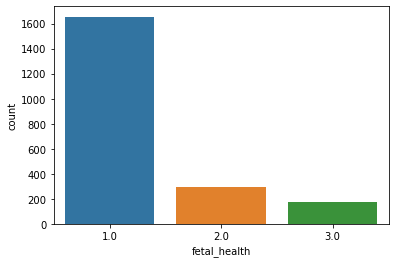

In [8]:
sns.countplot(data=df, x="fetal_health")

<AxesSubplot:xlabel='prolongued_decelerations', ylabel='fetal_movement'>

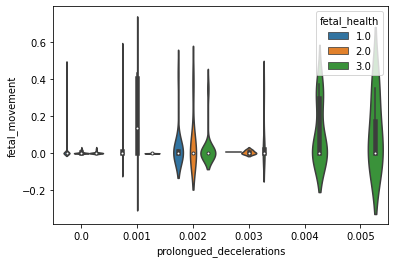

In [100]:
sns.violinplot(x='prolongued_decelerations', y='fetal_movement', data=df, hue='fetal_health')

<AxesSubplot:xlabel='fetal_movement', ylabel='uterine_contractions'>

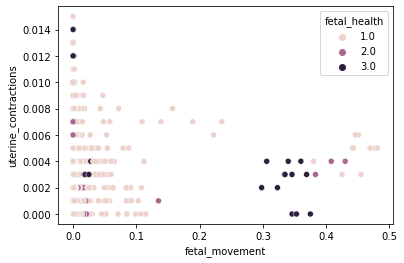

In [106]:
sns.scatterplot(x='fetal_movement', y='uterine_contractions', data=df, hue='fetal_health')

<AxesSubplot:xlabel='fetal_health', ylabel='fetal_movement'>

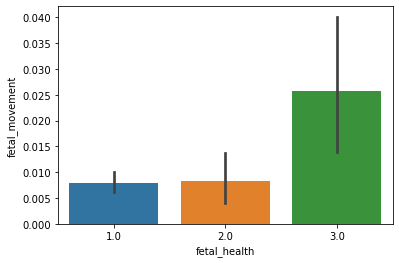

In [111]:
sns.barplot(x='fetal_health', y='fetal_movement', data=df)

<AxesSubplot:xlabel='abnormal_short_term_variability', ylabel='prolongued_decelerations'>

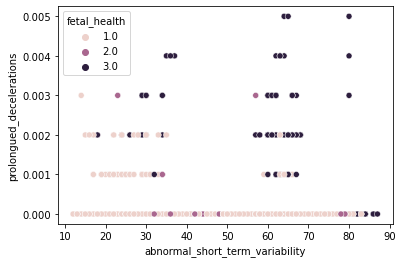

In [119]:
sns.scatterplot(x='abnormal_short_term_variability', y='prolongued_decelerations', data=df, hue='fetal_health')

<AxesSubplot:xlabel='percentage_of_time_with_abnormal_long_term_variability', ylabel='prolongued_decelerations'>

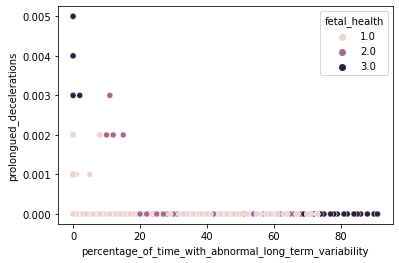

In [121]:
sns.scatterplot(x='percentage_of_time_with_abnormal_long_term_variability', y='prolongued_decelerations', data=df, hue='fetal_health')

<AxesSubplot:xlabel='percentage_of_time_with_abnormal_long_term_variability', ylabel='abnormal_short_term_variability'>

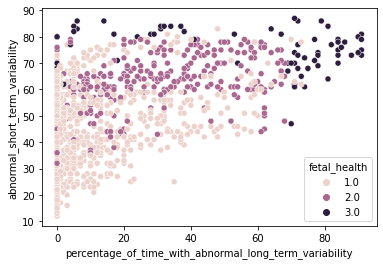

In [152]:
sns.scatterplot(x='percentage_of_time_with_abnormal_long_term_variability', y='abnormal_short_term_variability', data=df, hue='fetal_health')

<AxesSubplot:xlabel='fetal_health', ylabel='accelerations'>

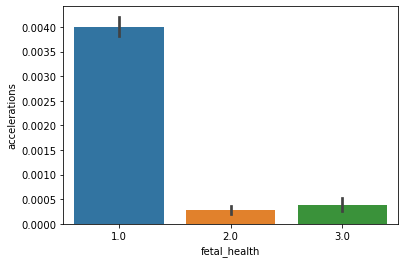

In [122]:
sns.barplot(x='fetal_health', y='accelerations', data=df)

In [10]:
values = df.fetal_health.value_counts().to_dict()
count = df.fetal_health.value_counts().to_list()
print(values, count)

{1.0: 1655, 2.0: 295, 3.0: 176} [1655, 295, 176]


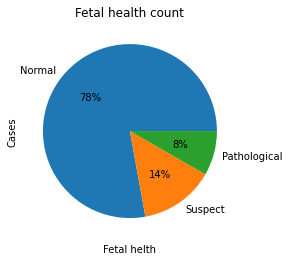

In [11]:
health_pie = plt.pie([count[0], count[1], count[2]], labels=["Normal", "Suspect", "Pathological"], autopct="%1.0f%%")
plt.title("Fetal health count")
plt.xlabel("Fetal helth")
plt.ylabel("Cases")
plt.show()

## Feature Correlation

In [72]:
correlations = df.corr()
sorted_vals = correlations['fetal_health'].sort_values(ascending=False).to_frame()
sorted_vals.style.background_gradient(cmap='mako')

,fetal_health
fetal_health,1.000000
prolongued_decelerations,0.484859
abnormal_short_term_variability,0.471191
percentage_of_time_with_abnormal_long_term_variability,0.426146
histogram_variance,0.206630
baseline value,0.148151
severe_decelerations,0.131934
fetal_movement,0.088010
histogram_min,0.063175
light_decelerations,0.058870


It seems that the prolongued decelerations and abnormal short term variability seem to be correlated with each other. It is good to keep this in mind when choosing features.

## Model Building

In [12]:
df.columns

Index(['baseline value', 'accelerations', 'fetal_movement',
       'uterine_contractions', 'light_decelerations', 'severe_decelerations',
       'prolongued_decelerations', 'abnormal_short_term_variability',
       'mean_value_of_short_term_variability',
       'percentage_of_time_with_abnormal_long_term_variability',
       'mean_value_of_long_term_variability', 'histogram_width',
       'histogram_min', 'histogram_max', 'histogram_number_of_peaks',
       'histogram_number_of_zeroes', 'histogram_mode', 'histogram_mean',
       'histogram_median', 'histogram_variance', 'histogram_tendency',
       'fetal_health'],
      dtype='object')

In [13]:
features = ['baseline value', 'accelerations', 'fetal_movement',
       'uterine_contractions', 'light_decelerations', 'severe_decelerations',
       'prolongued_decelerations', 'abnormal_short_term_variability',
       'mean_value_of_short_term_variability',
       'percentage_of_time_with_abnormal_long_term_variability',
       'mean_value_of_long_term_variability', 'histogram_width',
       'histogram_min', 'histogram_max', 'histogram_number_of_peaks',
       'histogram_number_of_zeroes', 'histogram_mode', 'histogram_mean',
       'histogram_median', 'histogram_variance', 'histogram_tendency']
       
label = ['fetal_health']

In [14]:
X_train, X_test, y_train, y_test = train_test_split(df[features], df[label], test_size=.3)

In [80]:
pipe_lr = Pipeline([('scaling', StandardScaler()),
                    ('lr_classifier', LogisticRegression())])
pipe_dt = Pipeline([('scaling', StandardScaler()),
                    ('dt_classifier', DecisionTreeClassifier())])
pipe_rf = Pipeline([('scaling', StandardScaler()),
                    ('rf_classifier', RandomForestClassifier())])
pipe_kn = Pipeline([('scaling', StandardScaler()),
                    ('pca', PCA()),
                    ('knn', KNeighborsClassifier())])

In [93]:
pipelines = [pipe_lr, pipe_dt, pipe_rf, pipe_kn]
pipe_names = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'KNN']

for pipe in pipelines:
    pipe.fit(X_train, y_train)

xval = StratifiedKFold(10, shuffle=True)

cv_accuracy = []
for i, model in enumerate(pipelines):
    cv_score = cross_val_score(model, X_train, y_train, cv=10)
    cv_accuracy.append(cv_score)
    print("%s: %f" % (pipe_names[i], cv_score.mean()))

Logistic Regression: 0.891797
Decision Tree: 0.915989
Random Forest: 0.939534
KNN: 0.905274


In [94]:
predictions = pipe_rf.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print(accuracy)

0.945141065830721


In [18]:
parameters = {
    'n_estimators': [100, 150, 200, 250],
    'criterion': ['gini', 'entropy'],
    'max_depth': [8, 10, 12, 14, 16, 18],
    'max_features': ['auto', 'sprt', 'log2'],
    'n_jobs': [-1, 1, None]
}

gridsearch = GridSearchCV(estimator=RandomForestClassifier(), param_grid=parameters, cv=5)
gridsearch.fit(X_train, y_train)

gridsearch.best_params_

{'criterion': 'gini',
 'max_depth': 16,
 'max_features': 'log2',
 'n_estimators': 150,
 'n_jobs': None}

In [83]:
gridsearch.best_estimator_

RandomForestClassifier(max_depth=16, max_features='log2', n_estimators=150)

In [88]:
gridsearch.best_score_

0.9388561227487402

In [127]:
model = RandomForestClassifier(**gridsearch.best_params_)
model.fit(X_train, y_train)
predictions = model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
accuracy

0.9388714733542319

In [128]:
recall = recall_score(y_test, predictions, average="weighted")
precision = precision_score(y_test, predictions, average="weighted")
f1 = f1_score(y_test, predictions, average="micro")
kappa = cohen_kappa_score(y_test, predictions)
print("Accuracy:", accuracy)
print("Recall:", recall)
print("Precision:", precision)
print("F1:", f1)
print("Cohen Kappa", kappa)

Accuracy: 0.9388714733542319
Recall: 0.9388714733542319
Precision: 0.9384968637387883
F1: 0.9388714733542319
Cohen Kappa 0.8385459925249169


In [129]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

         1.0       0.94      0.99      0.97       478
         2.0       0.92      0.71      0.80       101
         3.0       0.96      0.88      0.92        59

    accuracy                           0.94       638
   macro avg       0.94      0.86      0.90       638
weighted avg       0.94      0.94      0.94       638



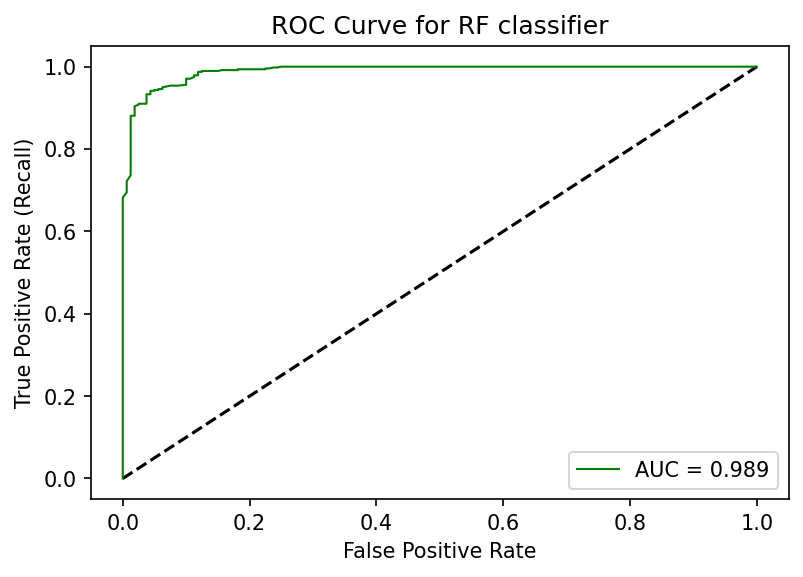

In [148]:
probas = model.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, probas[:,0], pos_label=1)

roc_auc = auc(fpr, tpr)
plt.figure(dpi=150)
plt.plot([0, 1], 'k--')
plt.plot(fpr, tpr, lw=1, color='green', label=f'AUC = {roc_auc:.3f}')
plt.title('ROC Curve for RF classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.legend()
plt.show()

In [151]:
roc_score = roc_auc_score(y_test, probas, multi_class='ovr')
print("Reciever Operator Curve area under curve score:", roc_score)

Reciever Operator Curve area under curve score: 0.9879409874877133


In [22]:
confusion = confusion_matrix(y_test, predictions)
confusion

array([[474,   3,   1],
       [ 27,  73,   1],
       [  3,   3,  53]])

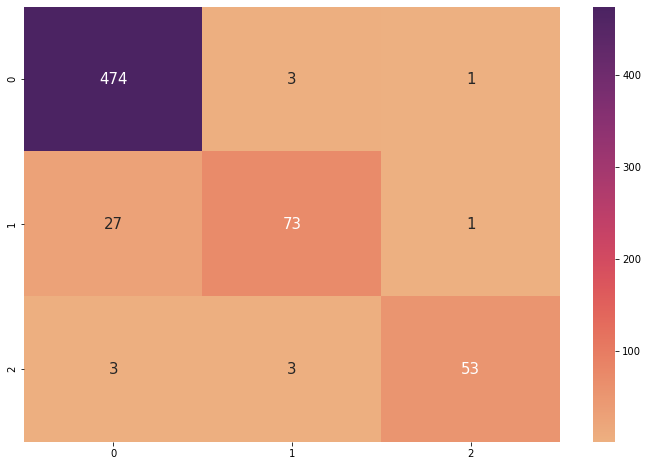

In [23]:
plt.subplots(figsize=(12,8))
sns.heatmap(confusion, cmap="flare", annot=True, annot_kws= {'size': 15}, fmt='g')
plt.show()

Our model worked out great, just keep in mind that you can use a random state to keep the model and the data split the same so that when you run it each time it is not different.